# Error Code Dilbert

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Retina display
%config InlineBackend.figure_format = 'retina'

In [1]:
!wget https://upload.wikimedia.org/wikipedia/en/f/f3/Dilbert-20050910.png

--2023-06-08 09:33:06--  https://upload.wikimedia.org/wikipedia/en/f/f3/Dilbert-20050910.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10713 (10K) [image/png]
Saving to: ‘Dilbert-20050910.png’

Dilbert-20050910.pn 100%[===================>]  10.46K  --.-KB/s    in 0s      

2023-06-08 09:33:06 (212 MB/s) - ‘Dilbert-20050910.png’ saved [10713/10713]



In [46]:
# Read Dilbert image as black and white
dilbert = plt.imread('Dilbert-20050910.png')[:,:,0]


(-0.5, 196.5, 184.5, -0.5)

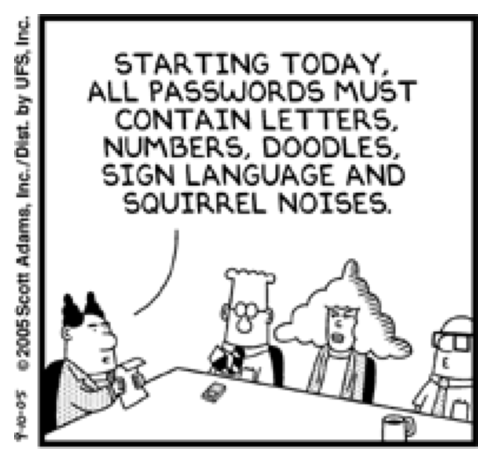

In [47]:
# Plot Dilbert without axis
plt.imshow(dilbert, cmap='gray')
plt.axis('off')

(-0.5, 196.5, 184.5, -0.5)

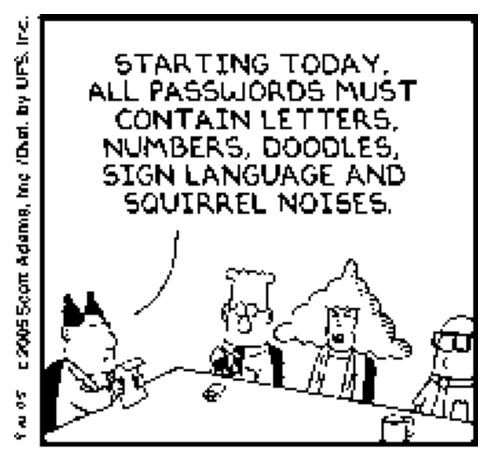

In [48]:
# Binarize Dilbert
dilbert = (dilbert > 0.5).astype(int)

# Plot Dilbert without axis
plt.imshow(dilbert, cmap='gray')
plt.axis('off')

In [49]:
# Function to flip a bit from 0 to 1 or 1 to 0 with a probability f
def flip_bit(x, f):
    if np.random.rand() < f:
        return 1 - x
    else:
        return x
    
# Function to generate a noisy image
def noisy_image(image, f):
    return np.array([[flip_bit(x, f) for x in row] for row in image])


Text(0.5, 1.0, 'Noisy 2')

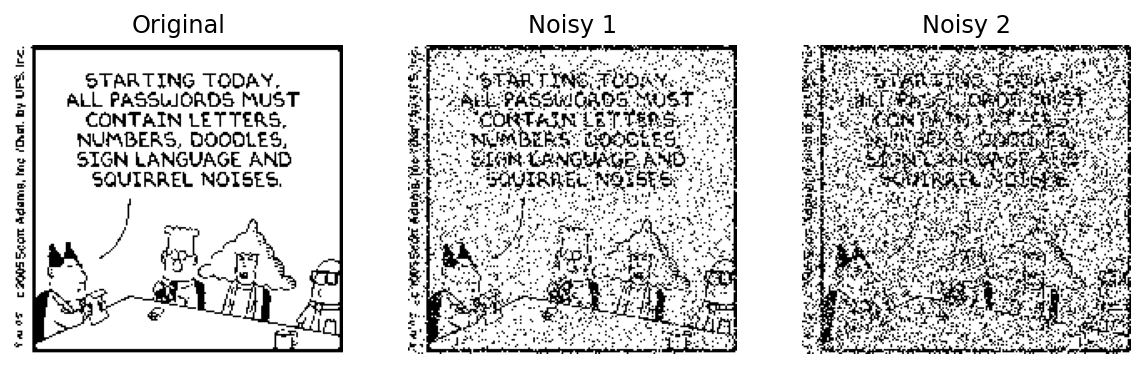

In [50]:
noisy_image1 = noisy_image(dilbert, 0.1)
noisy_image2 = noisy_image(dilbert, 0.2)

# Plot noisy images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(dilbert, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image1, cmap='gray')
plt.axis('off')
plt.title('Noisy 1')
plt.subplot(1, 3, 3)
plt.imshow(noisy_image2, cmap='gray')
plt.axis('off')
plt.title('Noisy 2')


In [51]:
# Function to generate N noisy images

def generate_noisy_images(image, f, N):
    return np.array([noisy_image(image, f) for i in range(N)])

# Function to plot original and N noisy images
def plot_noisy_images(image, noisy_images):
    N = len(noisy_images)
    plt.figure(figsize=(10, 5))
    plt.subplot(1, N+1, 1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.title('Original')
    for i in range(N):
        plt.subplot(1, N+1, i+2)
        plt.imshow(noisy_images[i], cmap='gray')
        plt.axis('off')
        plt.title('Noisy {}'.format(i+1))


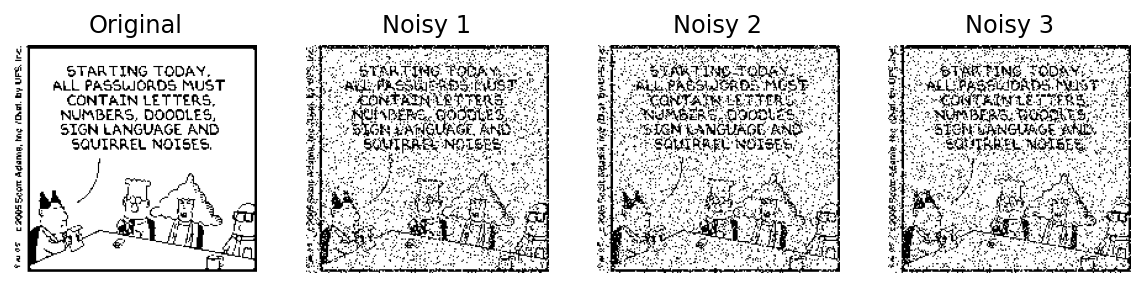

In [52]:
noisy_images = generate_noisy_images(dilbert, 0.1, 3)
plot_noisy_images(dilbert, noisy_images)

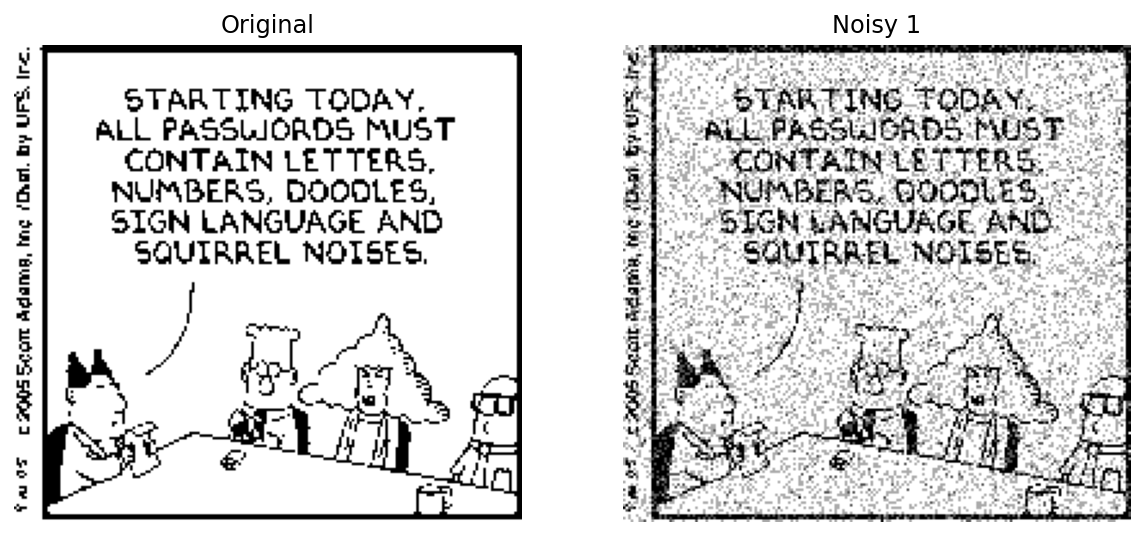

In [53]:
# Build the decoder which does a majority vote across the N noisy images
# Each image contains only 0s and 1s, so the majority vote is argmax

# Average across the N noisy images
def average_noisy_images(noisy_images):
    return np.mean(noisy_images, axis=0)

# plot the average noisy image
average_noisy_image = average_noisy_images(noisy_images)
plot_noisy_images(dilbert, [average_noisy_image])



In [54]:
dilbert

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [55]:
decoded_image = (average_noisy_image > 0.5).astype(int)
decoded_image

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]])

(-0.5, 196.5, 184.5, -0.5)

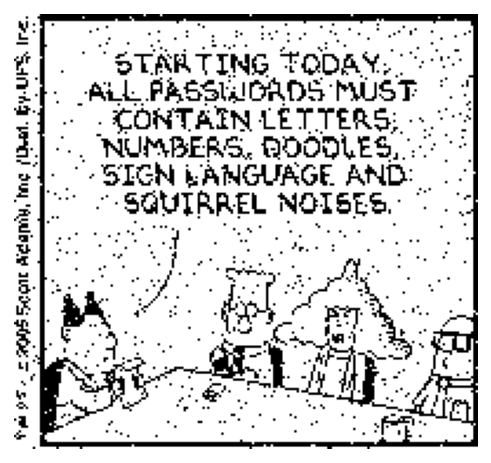

In [57]:
# Plot the decoded image
plt.imshow(decoded_image, cmap='gray')
plt.axis('off')

In [58]:
# Error between original and decoded image
def error(image, decoded_image):
    return np.sum(image != decoded_image) / image.size

# Error between original and noisy images
def error_noisy_images(image, noisy_images):
    return np.array([error(image, noisy_image) for noisy_image in noisy_images])

# Error between each N noisy images and the original 
def error_noisy_images(image, noisy_images):
    return np.array([error(image, noisy_image) for noisy_image in noisy_images])

# Plot the error between each noisy image and the original
error_noisy_images(dilbert, noisy_images)

array([0.10155028, 0.10166004, 0.100782  ])

In [59]:
# Error between decoded image and original
error(dilbert, decoded_image)

0.028700782000274386

In [86]:
# Function to generate noisy images and decode them and compute the error for a given f and N
# Plot the noisy images and the decoded image.
# Return the error between the original and decoded image
# Title the plot with the error
def error_f_N(f, N):
    noisy_images = generate_noisy_images(dilbert, f, N)
    decoded_image = ( average_noisy_images(noisy_images) > 0.5 ).astype(int)
    err  = error(dilbert, decoded_image)
    # Plot all noisy images in first figure and the second figure just shows original and the decoded image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, N+1, 1)
    plt.imshow(dilbert, cmap='gray')
    plt.axis('off')
    plt.title('Original')
    for i in range(N):
        plt.subplot(1, N+1, i+2)
        plt.imshow(noisy_images[i], cmap='gray')
        plt.axis('off')
        # If N > 8 then the title is too long and the plot is not readable so we do not show the title
        if N <= 8:
            plt.title('Noisy {}'.format(i+1))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(dilbert, cmap='gray')
    plt.axis('off')
    plt.title('Original')
    plt.subplot(1, 2, 2)
    plt.imshow(decoded_image, cmap='gray')
    plt.title('Decoded (Error: {:.4f})'.format(err))
    plt.axis('off')
    
    return err

0.026807518178076552

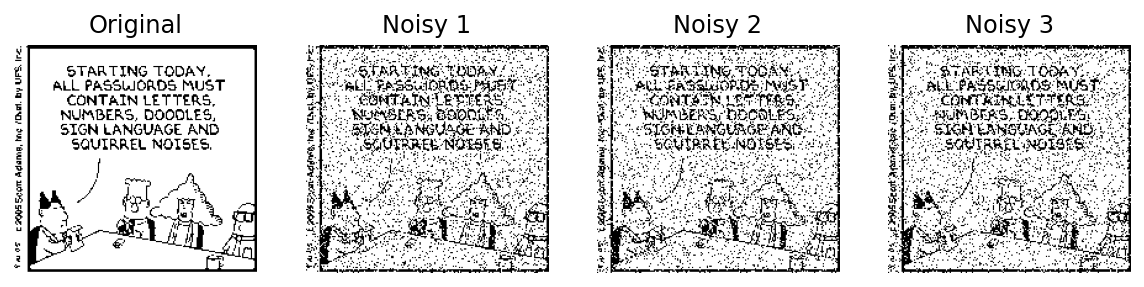

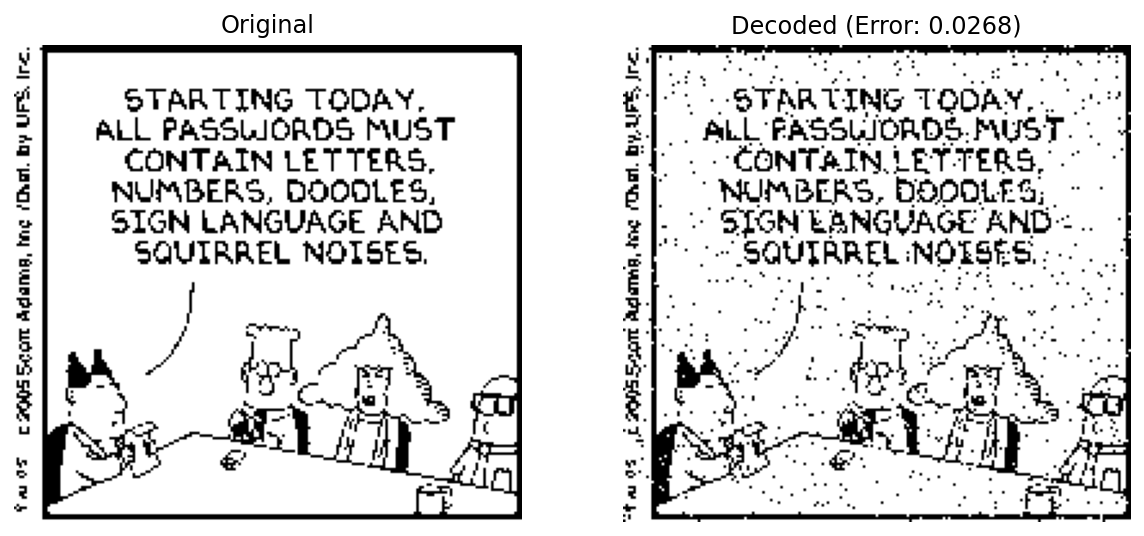

In [87]:
error_f_N(0.1, 3)

0.008698038139662505

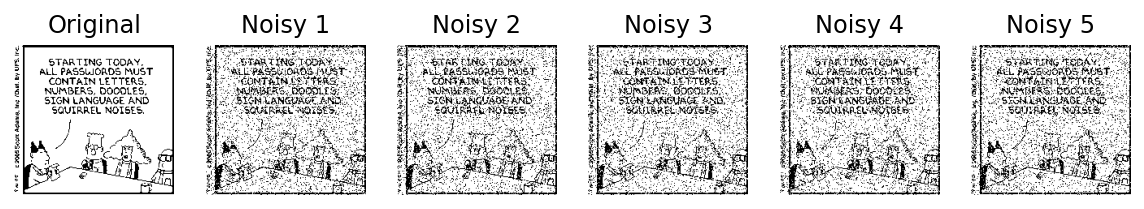

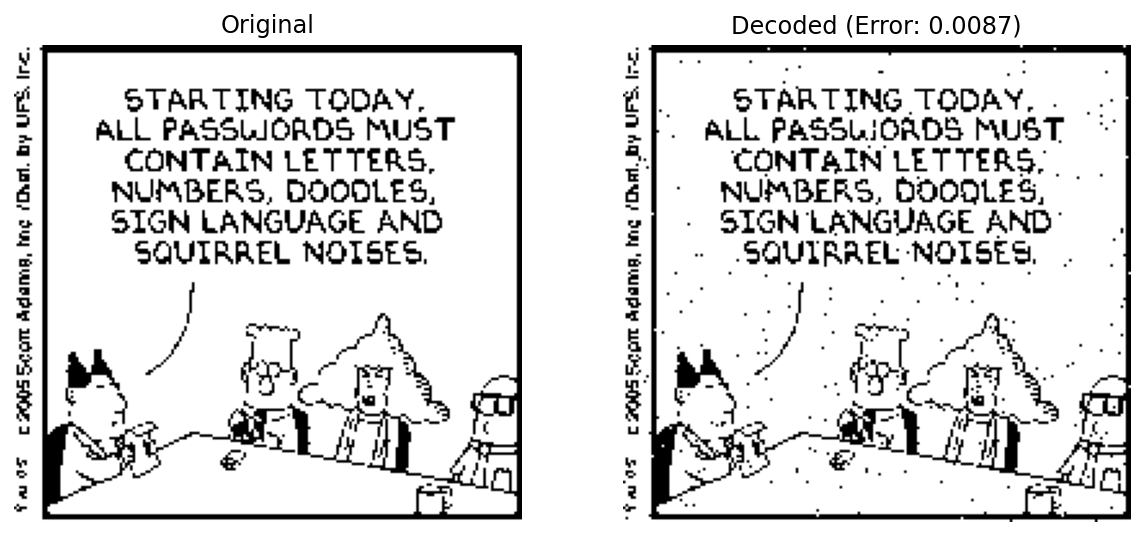

In [88]:
error_f_N(0.1, 5)

0.0012621758814652215

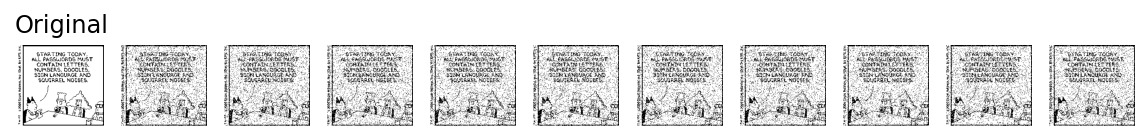

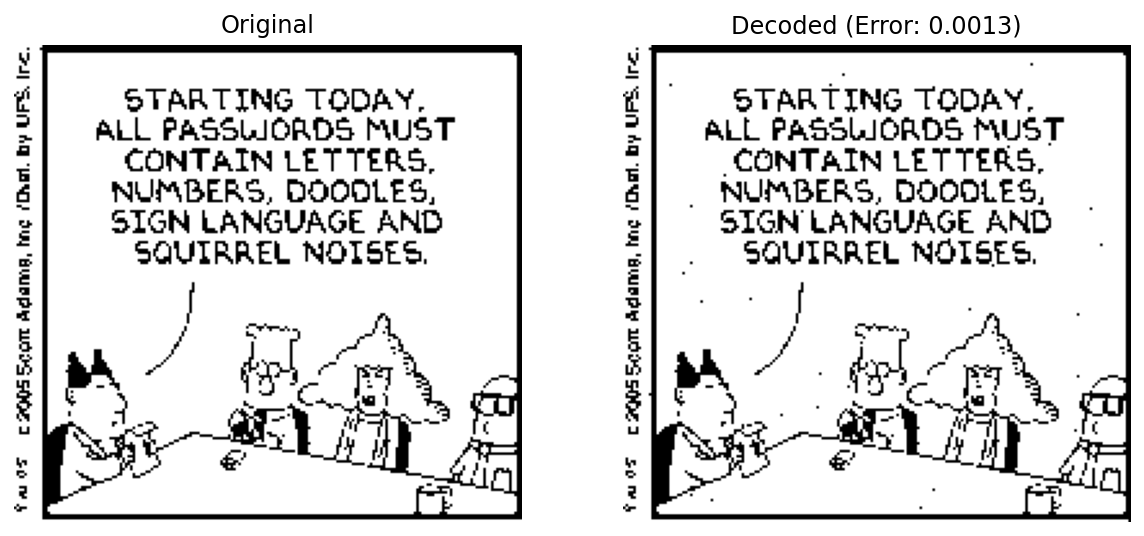

In [89]:
error_f_N(0.1, 10)

0.3344491699821649

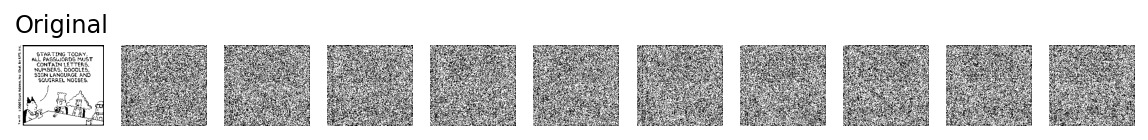

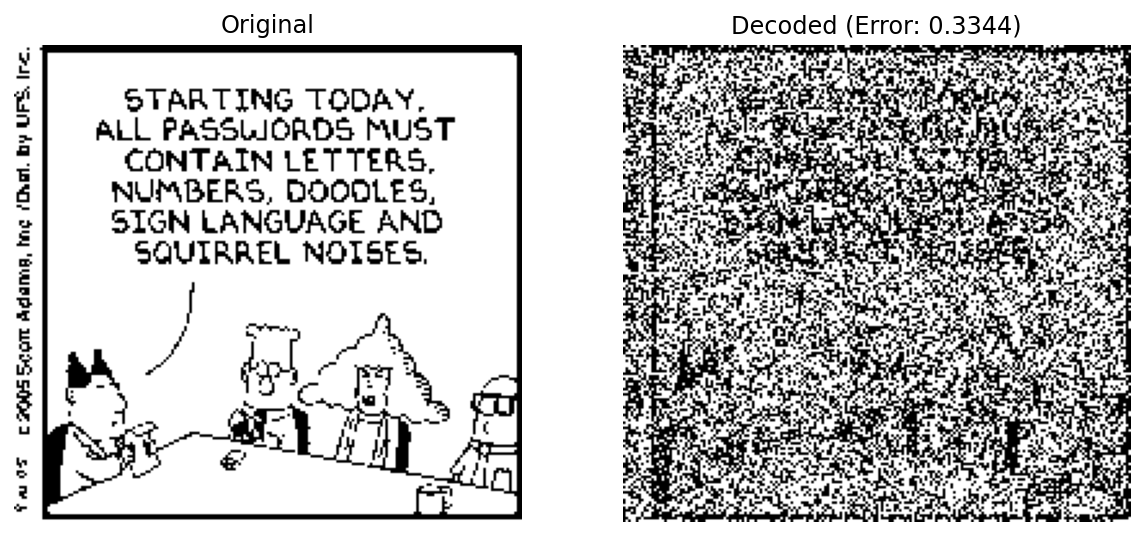

In [90]:
error_f_N(0.4, 10)

0.3031691590067225

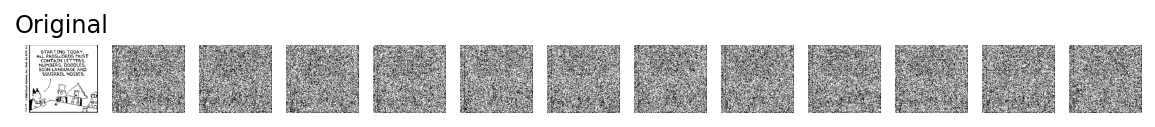

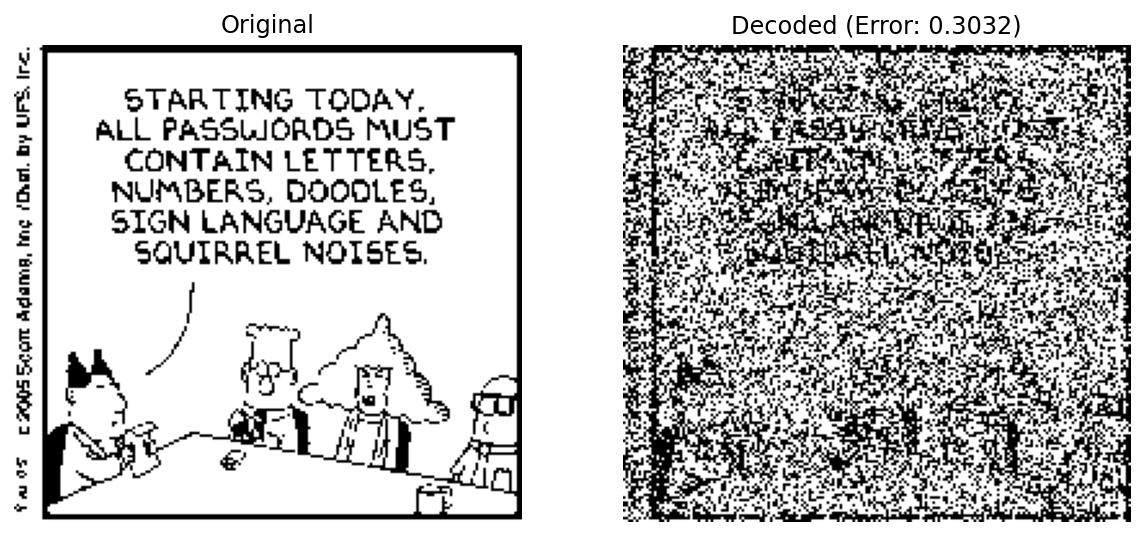

In [91]:
error_f_N(0.4, 12)

0.025792289751680613

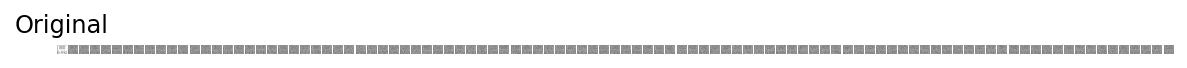

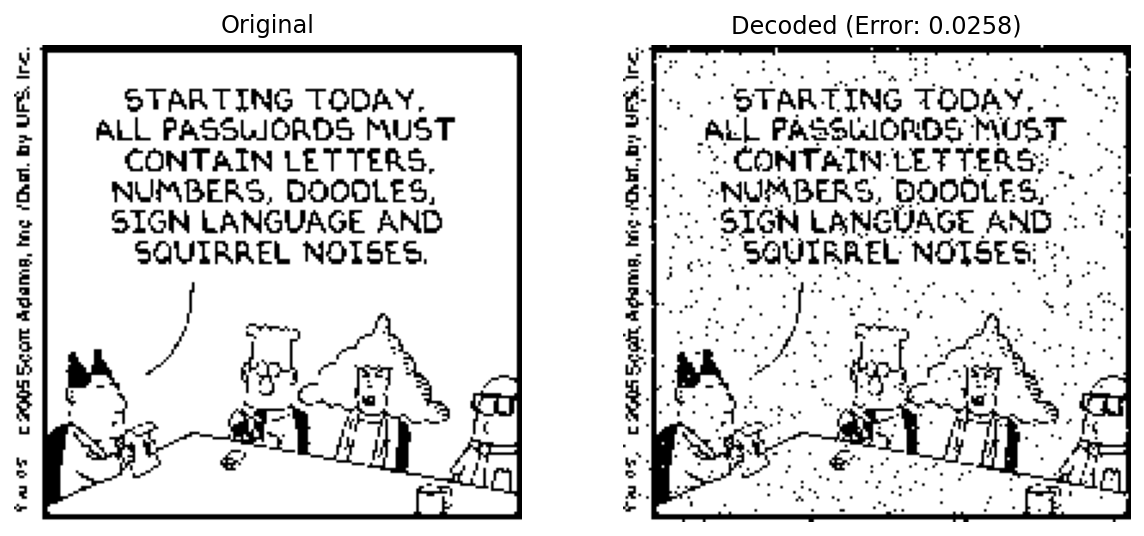

In [95]:
error_f_N(0.4, 100)